In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 8:2
df = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv')
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df = df[['Date','Price']]

data = df[['Price']]
data = data.dropna()
data = data.reset_index(drop=True) 


In [3]:
df

,Date,Price
0,3/1/2019,47765.0
1,3/4/2019,48226.0
2,3/5/2019,48379.0
3,3/6/2019,48149.0
4,3/7/2019,48456.0
...,...,...
1308,5/27/2024,90200.0
1309,5/28/2024,90700.0
1310,5/29/2024,89800.0
1311,5/30/2024,88600.0


In [4]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 8:2
train_size = int(0.8 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

In [5]:
# 3. Preparing the data

x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)

In [6]:
# 4.  Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [7]:
# 5. Predict on test set
y_pred = model.predict(x_test)

In [8]:
# 7. RMSE, MAPE, MAE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mape = np.mean(np.abs((y_test - y_pred) / y_pred)) * 100
test_mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Percentage Error (MAPE):", test_mape)
print("Mean Absolute Error (MAE):", test_mae)
print("Root Mean Squared Error (RMSE):", test_rmse)

Mean Absolute Percentage Error (MAPE): 10.542758986843689
Mean Absolute Error (MAE): 8439.478092427982
Root Mean Squared Error (RMSE): 9168.429607048805


In [9]:
# 7.1. Predicted closing prices for the next 30 days
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index, last_index+30)).reshape(-1, 1)

y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_data)

Predicted closing prices for the next 30 days:
[[82146.374769  ]
 [82163.69899033]
 [82181.02321165]
 [82198.34743297]
 [82215.6716543 ]
 [82232.99587562]
 [82250.32009695]
 [82267.64431827]
 [82284.9685396 ]
 [82302.29276092]
 [82319.61698224]
 [82336.94120357]
 [82354.26542489]
 [82371.58964622]
 [82388.91386754]
 [82406.23808886]
 [82423.56231019]
 [82440.88653151]
 [82458.21075284]
 [82475.53497416]
 [82492.85919549]
 [82510.18341681]
 [82527.50763813]
 [82544.83185946]
 [82562.15608078]
 [82579.48030211]
 [82596.80452343]
 [82614.12874476]
 [82631.45296608]
 [82648.7771874 ]]
RangeIndex(start=1312, stop=1342, step=1)


In [10]:
# 7.2. Predicted closing prices for the next 60 days
last_index =  data.index[-1]
last_data_60 = pd.RangeIndex(start=last_index+1, stop=last_index+61, step=1)
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

y_next_60_days = model.predict(x_next_60_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_60_days)

Predicted closing prices for the next 30 days:
[[82163.69899033]
 [82181.02321165]
 [82198.34743297]
 [82215.6716543 ]
 [82232.99587562]
 [82250.32009695]
 [82267.64431827]
 [82284.9685396 ]
 [82302.29276092]
 [82319.61698224]
 [82336.94120357]
 [82354.26542489]
 [82371.58964622]
 [82388.91386754]
 [82406.23808886]
 [82423.56231019]
 [82440.88653151]
 [82458.21075284]
 [82475.53497416]
 [82492.85919549]
 [82510.18341681]
 [82527.50763813]
 [82544.83185946]
 [82562.15608078]
 [82579.48030211]
 [82596.80452343]
 [82614.12874476]
 [82631.45296608]
 [82648.7771874 ]
 [82666.10140873]
 [82683.42563005]
 [82700.74985138]
 [82718.0740727 ]
 [82735.39829402]
 [82752.72251535]
 [82770.04673667]
 [82787.370958  ]
 [82804.69517932]
 [82822.01940065]
 [82839.34362197]
 [82856.66784329]
 [82873.99206462]
 [82891.31628594]
 [82908.64050727]
 [82925.96472859]
 [82943.28894992]
 [82960.61317124]
 [82977.93739256]
 [82995.26161389]
 [83012.58583521]
 [83029.91005654]
 [83047.23427786]
 [83064.55849918]

In [11]:
# 7.3. Predicted closing prices for the next 90 days
last_index =  data.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)
x_next_90_days = np.array(range(last_index, last_index+90)).reshape(-1, 1)

y_next_90_days = model.predict(x_next_90_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_90_days)

Predicted closing prices for the next 30 days:
[[82146.374769  ]
 [82163.69899033]
 [82181.02321165]
 [82198.34743297]
 [82215.6716543 ]
 [82232.99587562]
 [82250.32009695]
 [82267.64431827]
 [82284.9685396 ]
 [82302.29276092]
 [82319.61698224]
 [82336.94120357]
 [82354.26542489]
 [82371.58964622]
 [82388.91386754]
 [82406.23808886]
 [82423.56231019]
 [82440.88653151]
 [82458.21075284]
 [82475.53497416]
 [82492.85919549]
 [82510.18341681]
 [82527.50763813]
 [82544.83185946]
 [82562.15608078]
 [82579.48030211]
 [82596.80452343]
 [82614.12874476]
 [82631.45296608]
 [82648.7771874 ]
 [82666.10140873]
 [82683.42563005]
 [82700.74985138]
 [82718.0740727 ]
 [82735.39829402]
 [82752.72251535]
 [82770.04673667]
 [82787.370958  ]
 [82804.69517932]
 [82822.01940065]
 [82839.34362197]
 [82856.66784329]
 [82873.99206462]
 [82891.31628594]
 [82908.64050727]
 [82925.96472859]
 [82943.28894992]
 [82960.61317124]
 [82977.93739256]
 [82995.26161389]
 [83012.58583521]
 [83029.91005654]
 [83047.23427786]

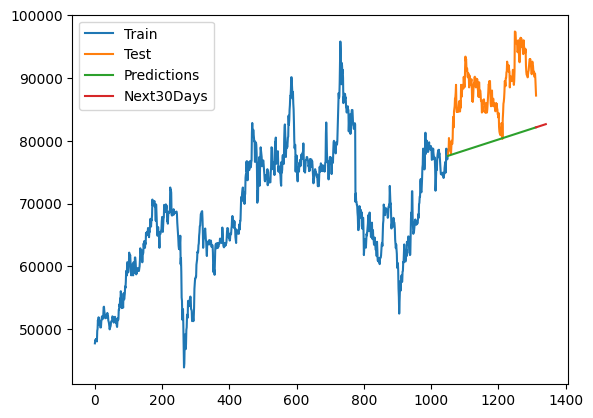

In [12]:
# 8.1. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Days'])
plt.show()

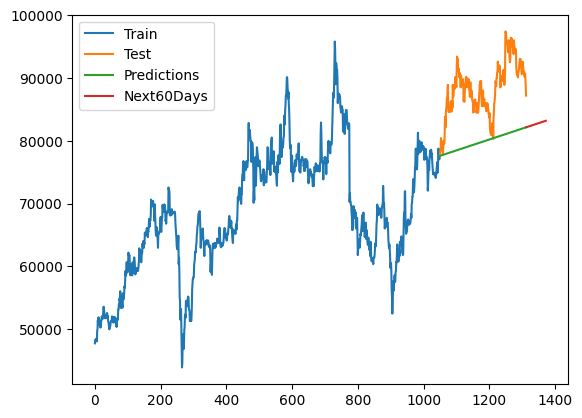

In [13]:
# 8.2. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Days'])
plt.show()

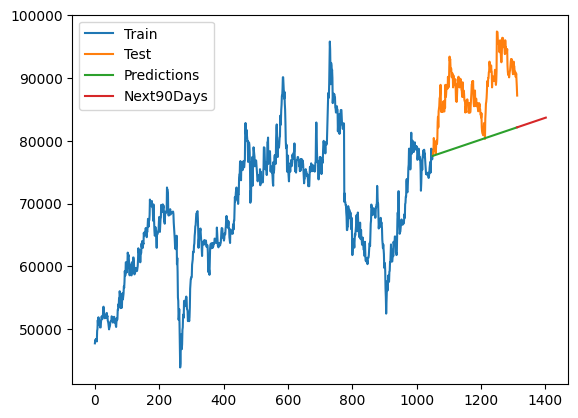

In [14]:
# 8.3. Plotting
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Days'])
plt.show()